# Clustering of travel reviews

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
import seaborn as sb

from sklearn.model_selection import GridSearchCV

import numpy as np

from sklearn.preprocessing import StandardScaler

# Describe the dataset
This dataset shows us travel reviews. The purpouse of the dataset is to find the patterns in the user reviews and create clusters so that we could group together the similarties in the reviews. This dataset only has feautres, these include the users corresponding average reviews in different categories. some examples of the review categories: beaches, galleries and restaurants. This dataset has no target

In [2]:
review_data_original = pd.read_csv('data/tripadvisor_review.csv').astype('category')
review_data_original.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


# Preprocessing of data
made all the features in the data numerical, because the functions we are going to use further on require numerical data to work, like hist()

I also removed the user ID column because this is not a feautre but only an ID

In [3]:
review_data_original= review_data_original.drop('User ID', axis=1)
review_data_original = review_data_original.apply(pd.to_numeric, errors='coerce')
review_data_original.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


# Exploring the dataset
 using distribution, correlation and Principal Component Analysis


# distribution Analysis
this shows us how the data in each feature is distributed. looking at the distribution of the features we can see that they are for the most part normally distributed, not perfectly but from the hist function they all have a clear peak. 

This can help us decide what kind of clustering models we can use:  
algortihms for normaly distributed data:  
Kmeans  
AgglomerativeClustering  
DBSCAN  


array([[<Axes: title={'center': 'Category 1'}>,
        <Axes: title={'center': 'Category 2'}>,
        <Axes: title={'center': 'Category 3'}>],
       [<Axes: title={'center': 'Category 4'}>,
        <Axes: title={'center': 'Category 5'}>,
        <Axes: title={'center': 'Category 6'}>],
       [<Axes: title={'center': 'Category 7'}>,
        <Axes: title={'center': 'Category 8'}>,
        <Axes: title={'center': 'Category 9'}>],
       [<Axes: title={'center': 'Category 10'}>, <Axes: >, <Axes: >]],
      dtype=object)

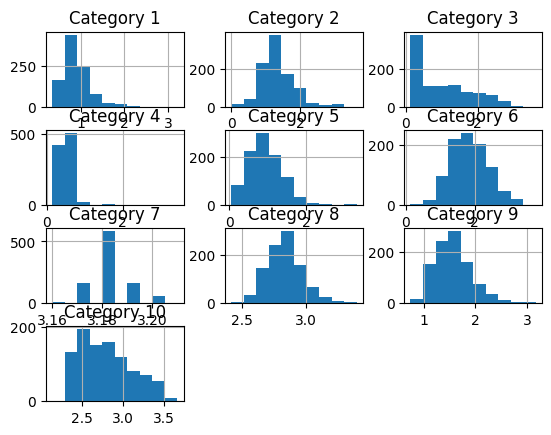

In [4]:
review_data_original.hist()

# correlation Analysis
we can see from the tabel under that category 7 and 3 has very high correlation at 0.75. category 5 and 6 also has a moderately high correlation with 0.581. feature 7 and 10 also has high negative correlation with -0.711

this means that we have some redundancy in the dataset, and we can lower the dimentionality of the dataset

In [5]:
review_correlation = review_data_original.corr()
review_correlation.style.background_gradient(cmap='coolwarm')

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
Category 1,1.000000,-0.187692,0.008613,0.073456,-0.100483,0.094142,-0.012474,0.020029,-0.047313,0.050700
Category 2,-0.187692,1.000000,0.043586,0.131624,0.119631,0.148404,0.110052,-0.158642,0.073342,-0.065762
Category 3,0.008613,0.043586,1.000000,0.061128,0.281668,0.356435,0.750651,-0.172953,-0.085435,-0.440543
Category 4,0.073456,0.131624,0.061128,1.000000,0.101878,0.215866,0.228348,-0.103583,0.026670,-0.352909
Category 5,-0.100483,0.119631,0.281668,0.101878,1.000000,0.581306,0.232318,-0.020957,0.041693,-0.247470
Category 6,0.094142,0.148404,0.356435,0.215866,0.581306,1.000000,0.430743,0.000071,0.096410,-0.438104
Category 7,-0.012474,0.110052,0.750651,0.228348,0.232318,0.430743,1.000000,-0.072492,0.084965,-0.710731
Category 8,0.020029,-0.158642,-0.172953,-0.103583,-0.020957,0.000071,-0.072492,1.000000,0.169695,0.114701
Category 9,-0.047313,0.073342,-0.085435,0.026670,0.041693,0.096410,0.084965,0.169695,1.000000,-0.045682
Category 10,0.050700,-0.065762,-0.440543,-0.352909,-0.247470,-0.438104,-0.710731,0.114701,-0.045682,1.000000


# preprocessing of data after correlation:
we can remove wither category 7 or 3. i choose feature 7 because it also has negative correlation with feature 10.

we can also remove either category 5 or 6, i choose 6 because it also has a bit high correlation with category 3.

we can see that the correlation of the data looks way better after removing those columns

In [6]:
review_data = review_data_original
review_data= review_data.drop('Category 7' , axis=1)
review_data= review_data.drop('Category 10' , axis=1)
review_data= review_data.drop('Category 6' , axis=1)

review_correlation = review_data.corr()
review_correlation.style.background_gradient(cmap='coolwarm')

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 8,Category 9
Category 1,1.000000,-0.187692,0.008613,0.073456,-0.100483,0.020029,-0.047313
Category 2,-0.187692,1.000000,0.043586,0.131624,0.119631,-0.158642,0.073342
Category 3,0.008613,0.043586,1.000000,0.061128,0.281668,-0.172953,-0.085435
Category 4,0.073456,0.131624,0.061128,1.000000,0.101878,-0.103583,0.026670
Category 5,-0.100483,0.119631,0.281668,0.101878,1.000000,-0.020957,0.041693
Category 8,0.020029,-0.158642,-0.172953,-0.103583,-0.020957,1.000000,0.169695
Category 9,-0.047313,0.073342,-0.085435,0.026670,0.041693,0.169695,1.000000


In [7]:
review_data.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 8,Category 9
0,0.93,1.8,2.29,0.62,0.80,2.79,1.82
1,1.02,2.2,2.66,0.64,1.42,2.63,1.86
2,1.22,0.8,0.54,0.53,0.24,2.80,1.31
3,0.45,1.8,0.29,0.57,0.46,2.96,1.57
4,0.51,1.2,1.18,0.57,1.54,2.78,1.18


# Principal Component Analysis
This is used to lower dimentionality further. By lowering the dimentionality we can imporove the performance of our clustering algortihm. i choose to lower the dimentionality to 6, because there will still remain enough explained variance with 0.94.

[0.46842648 0.64757911 0.7675859  0.86082297 0.93576439 0.98763099
 1.        ]


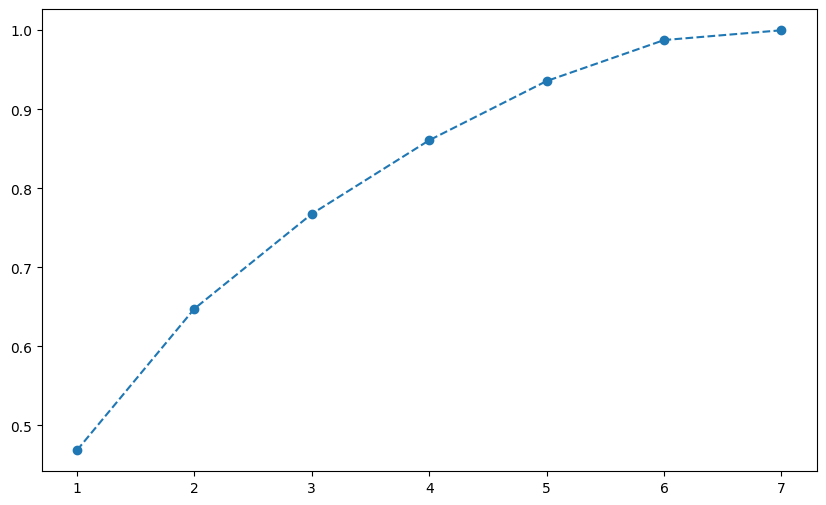

In [8]:
pca = PCA()
pca.fit(review_data)
reduced_numerical_features_census_income = pca.transform(review_data)
reduced_numerical_features_census_income.shape
explained_variance = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.show()


# reducing the dimentionality of the data:

In [9]:
pca = PCA(6)
review_data = pca.fit_transform(review_data)
review_data

review_data= pd.DataFrame(review_data)
review_data.head()

,0,1,2,3,4,5
0,1.230456,0.256178,-0.456624,0.358177,0.083181,0.009269
1,1.746315,0.757327,-0.118108,0.256940,0.276331,-0.122385
2,-0.626810,-0.770224,-0.407899,-0.103293,0.163112,0.049505
3,-0.783923,0.435537,-0.443610,0.007830,-0.346144,0.164170
4,0.302314,0.059059,0.510723,-0.485151,-0.320365,0.139276


# making the models and hyperparameter tuning
to make the mest model we have to test multiple parameters, and i will do that by parameter tuning

# Kmeans model

First i will find the best number of clusters by using the elbow method, so that we can confirm we have choosen the right number. i will also look at the silhouette score and davies score

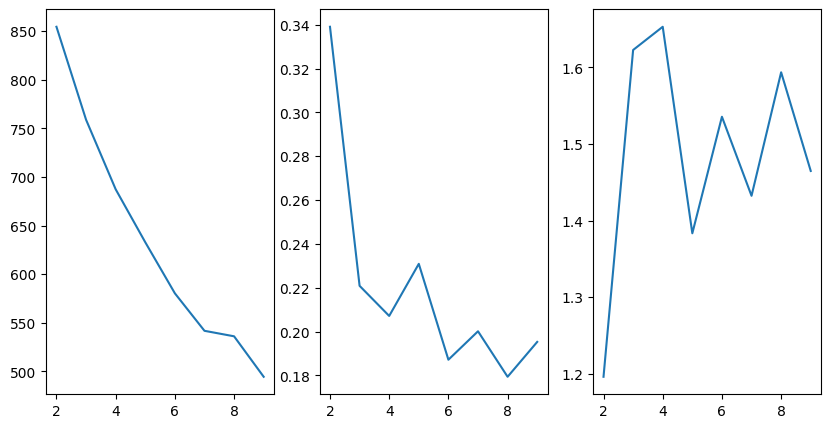

In [10]:
scores_inertia = []
scores_silhouette = []
scores_davies = []
n_clusters = range(2,10)
for i in n_clusters:
    km = KMeans(n_clusters=i).fit(review_data)
    scores_inertia.append(km.inertia_)
    scores_silhouette.append(silhouette_score(review_data, km.labels_))
    scores_davies.append(davies_bouldin_score(review_data, km.labels_))

fig, ax = plt.subplots(1, 3, figsize=(10,5))
ax[0].plot(n_clusters, scores_inertia)
ax[1].plot(n_clusters, scores_silhouette)
ax[2].plot(n_clusters, scores_davies)
plt.show()

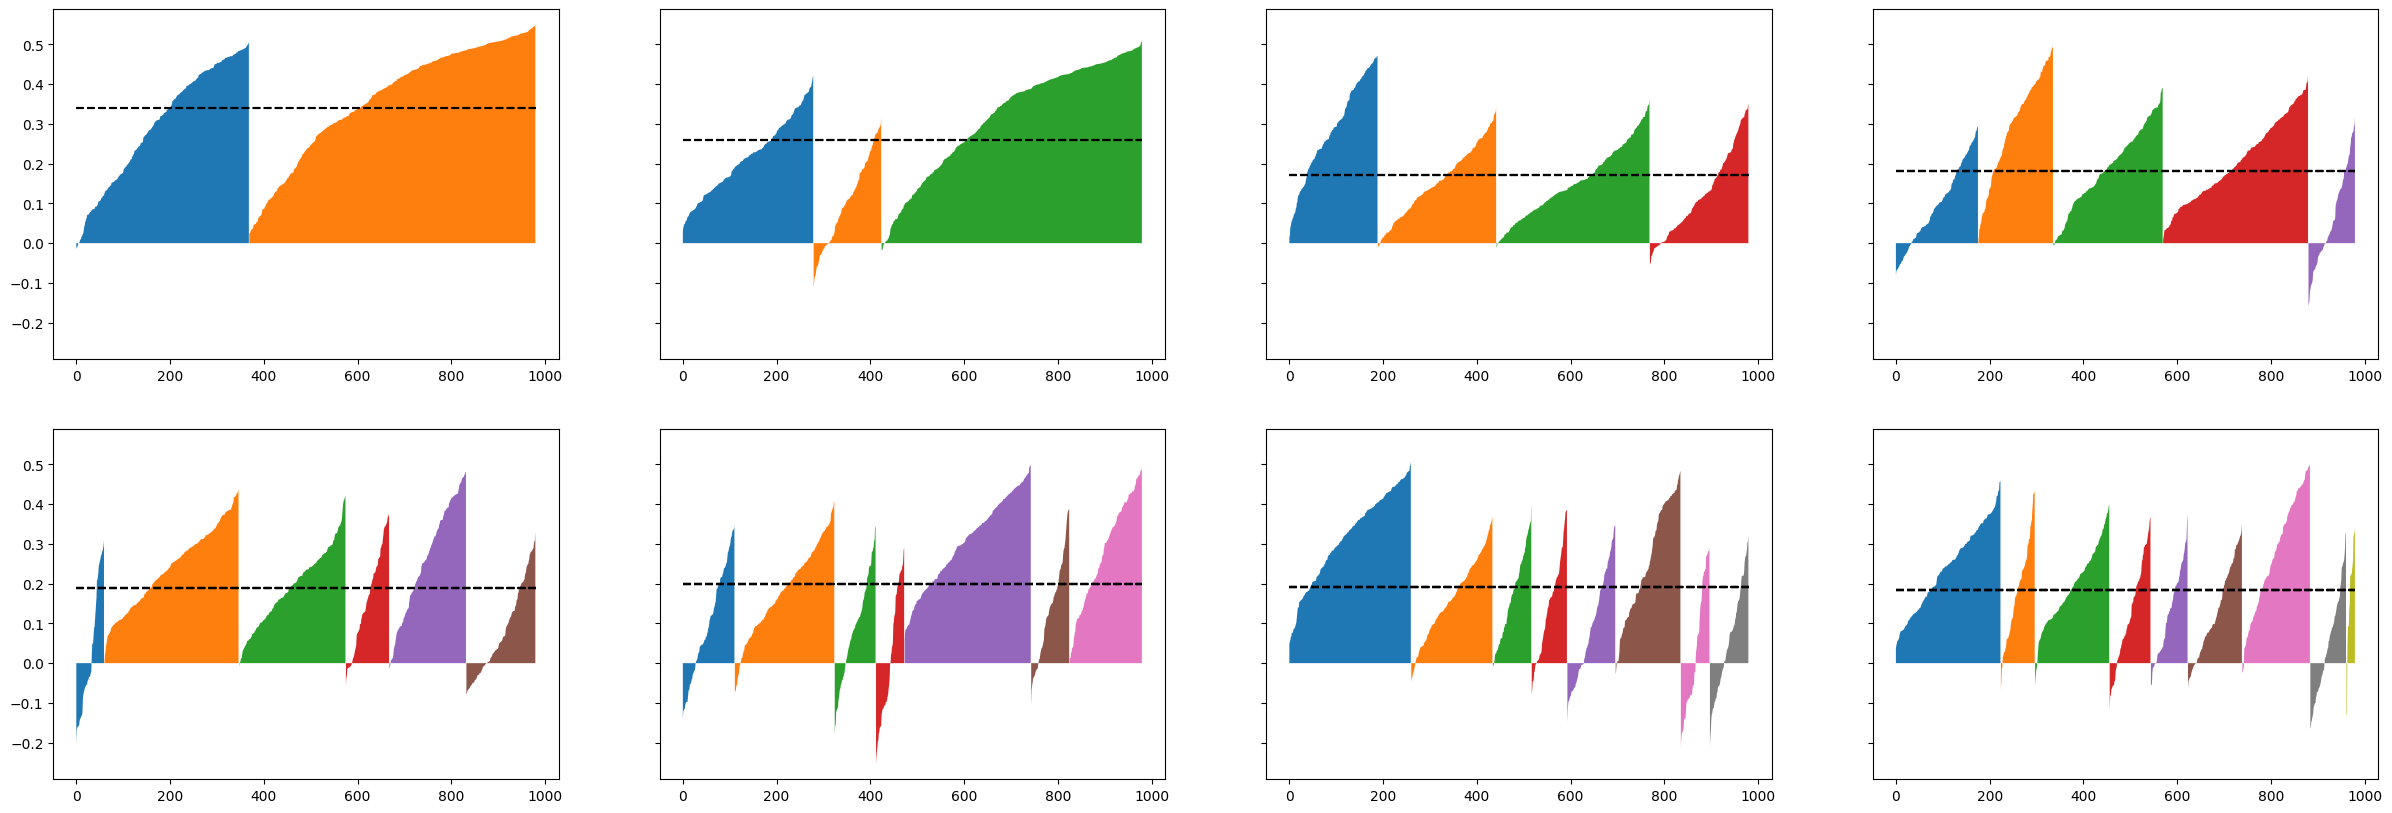

In [11]:
fig, ax = plt.subplots(2,4, sharey=True, figsize=(30,10))
for i in n_clusters:
    km = KMeans(n_clusters=i).fit(review_data)
    silhouette_average = silhouette_score(review_data, km.labels_)
    sample_silhouette = silhouette_samples(review_data, km.labels_)
    x_start = 0
    for cluster_i in range(i):
        ith_cluster_samples = sample_silhouette[km.labels_ == cluster_i]
        ith_cluster_samples.sort()
        x_end = x_start + ith_cluster_samples.shape[0]
        ax[(i-2)//4][(i-2)%4].fill_between(np.arange(x_start, x_end), 0, ith_cluster_samples)
        ax[(i-2)//4][(i-2)%4].plot([0,sample_silhouette.shape[0]],[silhouette_average, silhouette_average], '--', color='black')
        x_start = x_end 

the best number of clusters is 6. according to the elbow method, and it has okey silhouette and davies score

# hyperparameter tuning the rest of the parameters using grid search
i made my own scorers to use in grid search because it dosen't have silhouette score and david score build in, which i will use for all algortihms.

since i have found a good number for the clusters i will also find which other parameters will work well in combination. I will do this by trying a wide enough range with the most important parameters. 



In [12]:
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

def david_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return  -davies_bouldin_score(X, labels)

dt_params = {
    'n_init': range(1,16, 3),
    'max_iter': range(260,330, 10)
}

scoring = {
    'silhouette': silhouette_scorer,
    'davies': david_scorer
}

kmeans = KMeans(n_clusters=2)
km_grid = GridSearchCV(kmeans, dt_params, scoring=scoring, refit='silhouette')
km_grid.fit(review_data)
km_cv_result = pd.DataFrame(km_grid.cv_results_)
km_cv_result





,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_n_init,params,split0_test_silhouette,split1_test_silhouette,split2_test_silhouette,...,std_test_silhouette,rank_test_silhouette,split0_test_davies,split1_test_davies,split2_test_davies,split3_test_davies,split4_test_davies,mean_test_davies,std_test_davies,rank_test_davies
0,0.004925,0.004054,0.011015,0.004212,260,1,"{'max_iter': 260, 'n_init': 1}",0.362716,0.326213,0.367709,...,0.029528,35,-1.067542,-1.236581,-1.116934,-1.398866,-1.132739,-1.190532,0.117819,27
1,0.009605,0.003457,0.025940,0.003172,260,4,"{'max_iter': 260, 'n_init': 4}",0.368153,0.326213,0.367709,...,0.030538,18,-1.067542,-1.227127,-1.116934,-1.398866,-1.132739,-1.188642,0.117139,2
2,0.018263,0.004056,0.038359,0.003349,260,7,"{'max_iter': 260, 'n_init': 7}",0.368153,0.326577,0.367709,...,0.030482,21,-1.067542,-1.227127,-1.116934,-1.398866,-1.135126,-1.189119,0.116915,18
3,0.026455,0.003771,0.055014,0.004552,260,10,"{'max_iter': 260, 'n_init': 10}",0.368153,0.326577,0.367709,...,0.030507,5,-1.067542,-1.227127,-1.116934,-1.398866,-1.132739,-1.188642,0.117139,2
4,0.028778,0.002354,0.072113,0.003038,260,13,"{'max_iter': 260, 'n_init': 13}",0.368153,0.326577,0.367709,...,0.030482,21,-1.067542,-1.227127,-1.116934,-1.398866,-1.135126,-1.189119,0.116915,18
5,0.000000,0.000000,0.016184,0.000191,270,1,"{'max_iter': 270, 'n_init': 1}",0.368153,0.326364,0.367709,...,0.030491,29,-1.092401,-1.236581,-1.116934,-1.398866,-1.132739,-1.195504,0.112948,34
6,0.013022,0.003090,0.031802,0.006366,270,4,"{'max_iter': 270, 'n_init': 4}",0.368153,0.326577,0.368520,...,0.030660,1,-1.092401,-1.227127,-1.116934,-1.398866,-1.132739,-1.193613,0.112322,31
7,0.020659,0.002461,0.039626,0.004970,270,7,"{'max_iter': 270, 'n_init': 7}",0.368153,0.326577,0.367709,...,0.030482,21,-1.067542,-1.227127,-1.116934,-1.398866,-1.132739,-1.188642,0.117139,2
8,0.026006,0.003148,0.053012,0.003887,270,10,"{'max_iter': 270, 'n_init': 10}",0.368153,0.326577,0.367709,...,0.030507,5,-1.067542,-1.227127,-1.116934,-1.398866,-1.132739,-1.188642,0.117139,2
9,0.032509,0.000359,0.067633,0.003859,270,13,"{'max_iter': 270, 'n_init': 13}",0.368153,0.326577,0.367709,...,0.030507,5,-1.067542,-1.227127,-1.116934,-1.398866,-1.135126,-1.189119,0.116915,18


# AgglomerativeClustering model

# finding the best number of clusters

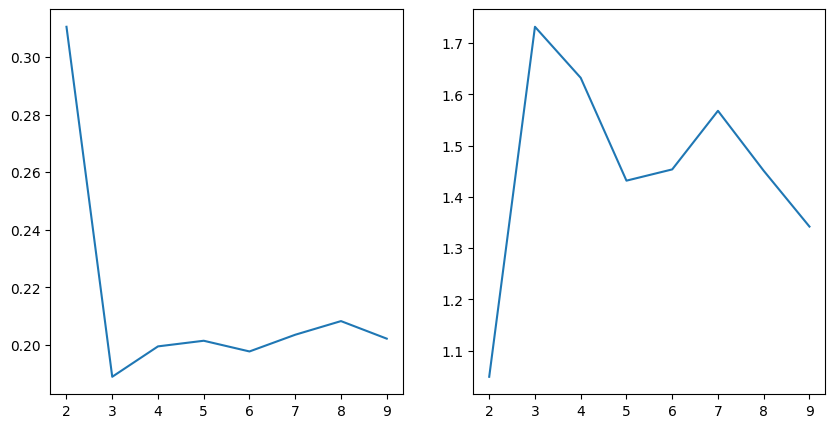

In [13]:
scores_silhouette = []
scores_davies = []
n_clusters = range(2,10)
for i in n_clusters:
    ac = AgglomerativeClustering(n_clusters=i).fit(review_data)
    scores_silhouette.append(silhouette_score(review_data, ac.labels_))
    scores_davies.append(davies_bouldin_score(review_data, ac.labels_))

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(n_clusters, scores_silhouette)
ax[1].plot(n_clusters, scores_davies)
plt.show()

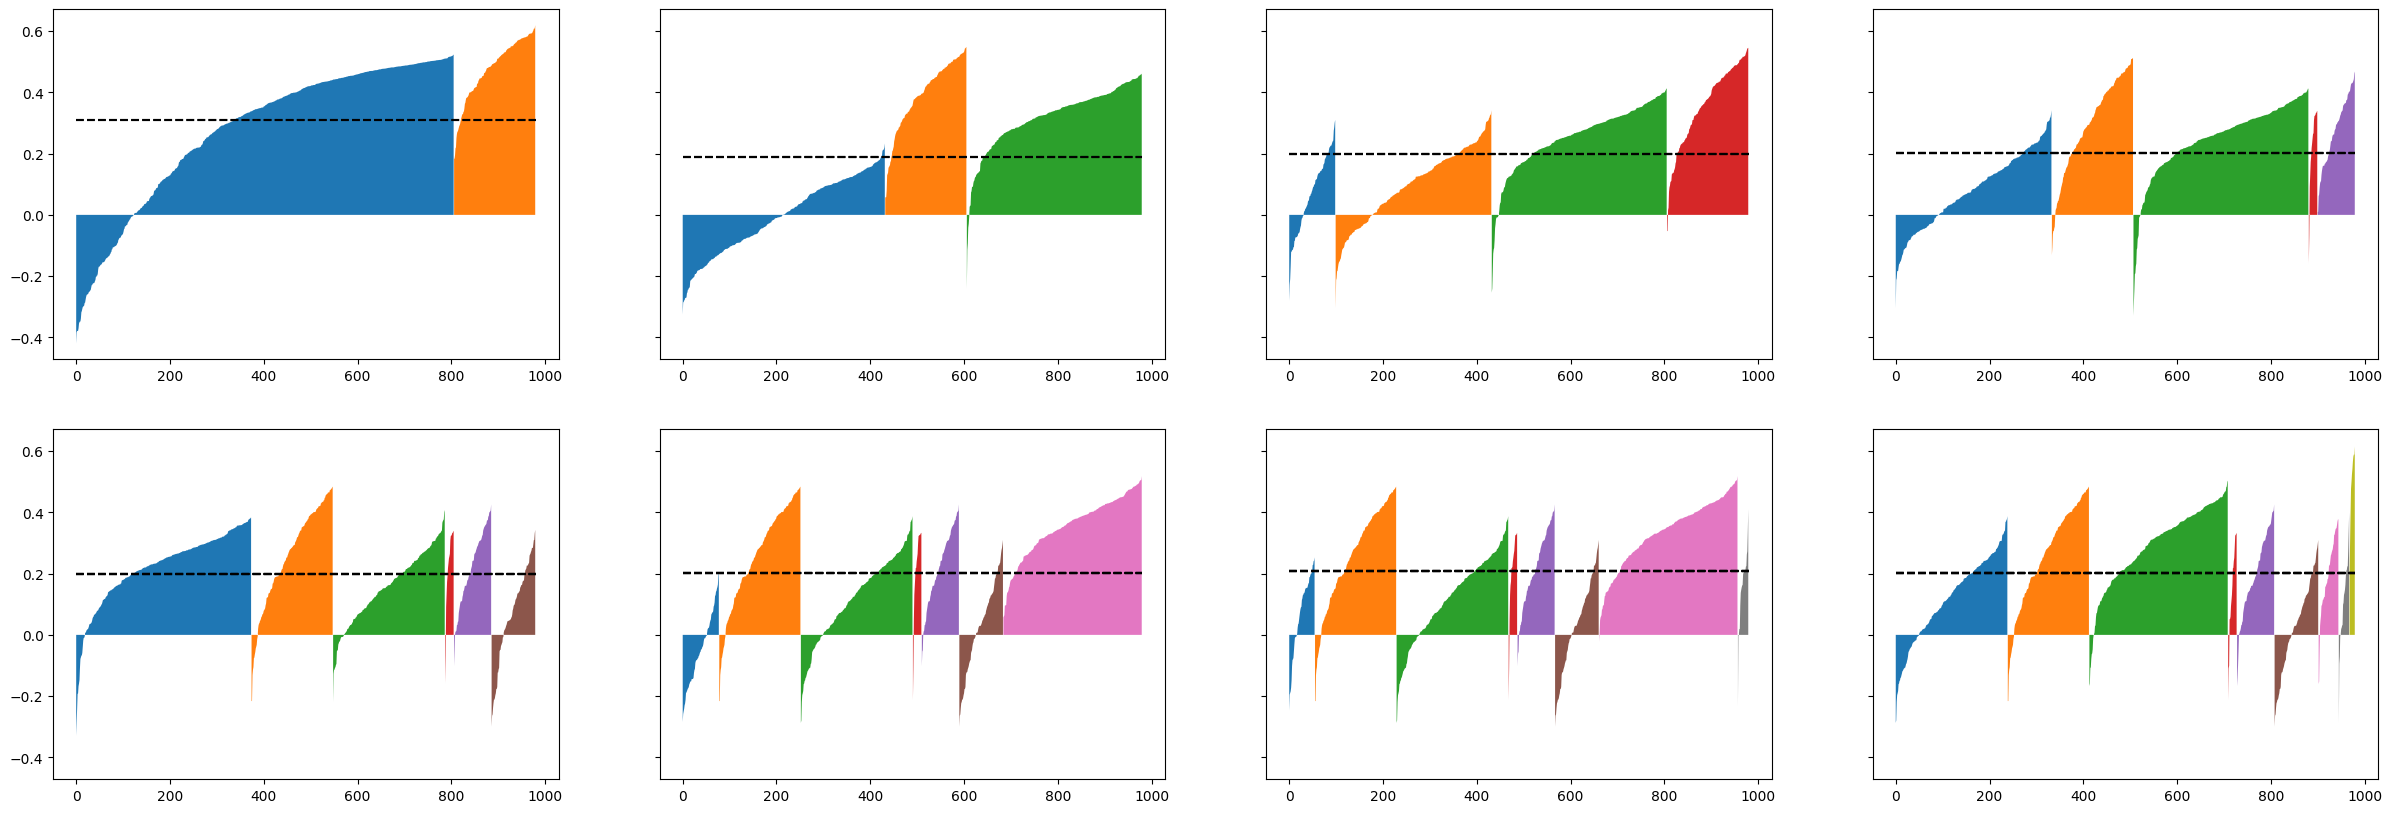

In [14]:
fig, ax = plt.subplots(2,4, sharey=True, figsize=(30,10))
for i in n_clusters:
    ac = AgglomerativeClustering(n_clusters=i).fit(review_data)
    silhouette_average = silhouette_score(review_data, ac.labels_)
    sample_silhouette = silhouette_samples(review_data, ac.labels_)
    x_start = 0
    for cluster_i in range(i):
        ith_cluster_samples = sample_silhouette[ac.labels_ == cluster_i]
        ith_cluster_samples.sort()
        x_end = x_start + ith_cluster_samples.shape[0]
        ax[(i-2)//4][(i-2)%4].fill_between(np.arange(x_start, x_end), 0, ith_cluster_samples)
        ax[(i-2)//4][(i-2)%4].plot([0,sample_silhouette.shape[0]],[silhouette_average, silhouette_average], '--', color='black')
        x_start = x_end 

The best number of clusters is 2, because this is where silhouette is the highest, and davies is the lowest.

using grid search to find the other parameters that will work in combination.   
this model had two other important parameters to tune  
not all models will work, because the parameter ward will only work with euclidean

In [15]:
ac_params = {
    'linkage': ['ward', 'complete', 'average', 'single'],
    'metric': ['euclidean', 'manhattan', 'cosine']
    
}

agglomerative = AgglomerativeClustering(n_clusters=2)
ac_grid = GridSearchCV(agglomerative, ac_params, scoring=scoring, refit='silhouette')
ac_grid.fit(review_data)
ac_cv_result = pd.DataFrame(ac_grid.cv_results_)
ac_cv_result

c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 886, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_linkage,param_metric,params,split0_test_silhouette,split1_test_silhouette,split2_test_silhouette,...,std_test_silhouette,rank_test_silhouette,split0_test_davies,split1_test_davies,split2_test_davies,split3_test_davies,split4_test_davies,mean_test_davies,std_test_davies,rank_test_davies
0,0.008749,0.001802,0.005579,0.003228,ward,euclidean,"{'linkage': 'ward', 'metric': 'euclidean'}",0.377802,0.280352,0.357843,...,0.043010,7,-0.999986,-1.404367,-1.143814,-1.306994,-1.188358,-1.208704,0.138660,7
1,0.003196,0.003914,0.000000,0.000000,ward,manhattan,"{'linkage': 'ward', 'metric': 'manhattan'}",NaN,NaN,NaN,...,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
2,0.000000,0.000000,0.000000,0.000000,ward,cosine,"{'linkage': 'ward', 'metric': 'cosine'}",NaN,NaN,NaN,...,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
3,0.006500,0.003256,0.008061,0.000115,complete,euclidean,"{'linkage': 'complete', 'metric': 'euclidean'}",0.377472,0.305497,0.333913,...,0.057650,5,-1.040279,-1.350179,-1.173421,-1.070156,-1.262233,-1.179253,0.116062,6
4,0.008026,0.000026,0.006504,0.003257,complete,manhattan,"{'linkage': 'complete', 'metric': 'manhattan'}",0.344851,0.306372,0.349384,...,0.069830,6,-1.054408,-1.328644,-1.160636,-0.943383,-1.107377,-1.118890,0.127148,5
5,0.009605,0.003202,0.006342,0.003179,complete,cosine,"{'linkage': 'complete', 'metric': 'cosine'}",0.148957,0.270702,0.293154,...,0.066276,9,-1.706906,-1.486454,-1.244980,-2.102082,-1.279720,-1.564028,0.315771,9
6,0.011190,0.003894,0.006674,0.003354,average,euclidean,"{'linkage': 'average', 'metric': 'euclidean'}",0.316429,0.432384,0.321392,...,0.071674,3,-0.943495,-0.437285,-0.535673,-0.943383,-0.379566,-0.647880,0.246432,3
7,0.009257,0.001739,0.005244,0.003076,average,manhattan,"{'linkage': 'average', 'metric': 'manhattan'}",0.268022,0.432384,0.387168,...,0.086537,2,-1.298061,-0.437285,-0.476287,-0.730504,-0.775559,-0.743539,0.307865,4
8,0.009307,0.002132,0.005297,0.003408,average,cosine,"{'linkage': 'average', 'metric': 'cosine'}",0.327223,0.316674,0.338172,...,0.028840,8,-1.188787,-1.220080,-1.183302,-1.575079,-1.256385,-1.284726,0.147498,8
9,0.003251,0.003983,0.006480,0.003243,single,euclidean,"{'linkage': 'single', 'metric': 'euclidean'}",0.173331,0.432384,0.387168,...,0.125023,4,-0.697701,-0.437285,-0.476287,-0.319886,-0.775559,-0.541343,0.169357,2


# DBSCAN model

this model dosen't have a parameter for clusters, but i will tune the two other most important parameters.  
eps:
min_samples:

In [16]:
dbscan_params = {
    'eps': np.linspace(0.1, 1.0, 10),
    'min_samples': range(2, 10)  
}  


dbscan = DBSCAN()


dbscan_grid = GridSearchCV(dbscan, dbscan_params, scoring=scoring, refit='silhouette')


dbscan_grid.fit(review_data)


dbscan_cv_result = pd.DataFrame(dbscan_grid.cv_results_)
dbscan_cv_result

c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 143, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
  File "C:\Users\Kosov\AppData\Local\Temp\ipykernel_16584\3543548602.py", line 3, in silhouette_scorer
    return silhouette_score(X, labels)
  File "c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\Kosov\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\cluster\_unsupervised.py", line 141, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=me

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eps,param_min_samples,params,split0_test_silhouette,split1_test_silhouette,split2_test_silhouette,...,std_test_silhouette,rank_test_silhouette,split0_test_davies,split1_test_davies,split2_test_davies,split3_test_davies,split4_test_davies,mean_test_davies,std_test_davies,rank_test_davies
0,0.004368,0.003698,0.022794,0.033724,0.1,2,"{'eps': 0.1, 'min_samples': 2}",-0.241178,-0.203196,NaN,...,NaN,61,-0.910385,-0.906315,NaN,-1.537086,-0.981197,NaN,NaN,61
1,0.006423,0.003231,0.006601,0.003368,0.1,3,"{'eps': 0.1, 'min_samples': 3}",NaN,NaN,NaN,...,NaN,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61
2,0.004804,0.003923,0.004811,0.003928,0.1,4,"{'eps': 0.1, 'min_samples': 4}",NaN,NaN,NaN,...,NaN,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61
3,0.007268,0.002005,0.005738,0.003077,0.1,5,"{'eps': 0.1, 'min_samples': 5}",NaN,NaN,NaN,...,NaN,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61
4,0.006606,0.003311,0.006312,0.003162,0.1,6,"{'eps': 0.1, 'min_samples': 6}",NaN,NaN,NaN,...,NaN,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.038773,0.008275,0.026097,0.006075,1.0,5,"{'eps': 1.0, 'min_samples': 5}",0.281874,0.338865,0.344512,...,0.050040,2,-2.023225,-2.441034,-2.908877,-1.502230,-2.726080,-2.320289,0.506586,19
76,0.048879,0.005224,0.027723,0.003903,1.0,6,"{'eps': 1.0, 'min_samples': 6}",0.281874,0.333087,0.342700,...,0.048120,3,-2.023225,-2.087255,-3.040333,-1.799067,-2.726080,-2.335192,0.468240,20
77,0.055193,0.006240,0.029185,0.004012,1.0,7,"{'eps': 1.0, 'min_samples': 7}",0.281874,0.333087,0.342700,...,0.043601,6,-2.023225,-2.087255,-3.040333,-1.995504,-2.726080,-2.374480,0.428132,21
78,0.050865,0.005421,0.031564,0.006512,1.0,8,"{'eps': 1.0, 'min_samples': 8}",0.281874,0.333087,0.342700,...,0.043601,6,-2.023225,-2.087255,-3.040333,-1.995504,-2.726080,-2.374480,0.428132,21


# comparing the best models i have found:
getting the best estimators from each grid search

In [17]:
km_best = km_grid.best_estimator_

km_labels = km_best.fit_predict(review_data)
print("results from the best kmeans model")
print(f"silhouette score: {silhouette_score(review_data, km_labels)}")
print(f"davies bouldin score: {davies_bouldin_score(review_data, km_labels)}")
print()

ac_best = ac_grid.best_estimator_

ac_labels = ac_best.fit_predict(review_data)

print("results from the best AgglomerativeClustering model")
print(f"silhouette score: {silhouette_score(review_data, ac_labels)}")
print(f"davies bouldin score: {davies_bouldin_score(review_data, ac_labels)}")
print()

dbscan_best = dbscan_grid.best_estimator_
dbscan_labels = dbscan_best.fit_predict(review_data)
print("results from the best dbscan model")
print(f"silhouette score: {silhouette_score(review_data, dbscan_labels)}")
print(f"davies bouldin score: {davies_bouldin_score(review_data, dbscan_labels)}")
print()


results from the best kmeans model
silhouette score: 0.3390618168646169
davies bouldin score: 1.1959890850574046

results from the best AgglomerativeClustering model
silhouette score: 0.49132791998692255
davies bouldin score: 0.622789764097248

results from the best dbscan model
silhouette score: 0.43920555527153415
davies bouldin score: 1.6381536608477356



In [18]:
review_data.columns = review_data.columns.astype(str)

# visualizing the clusters

# kmeans

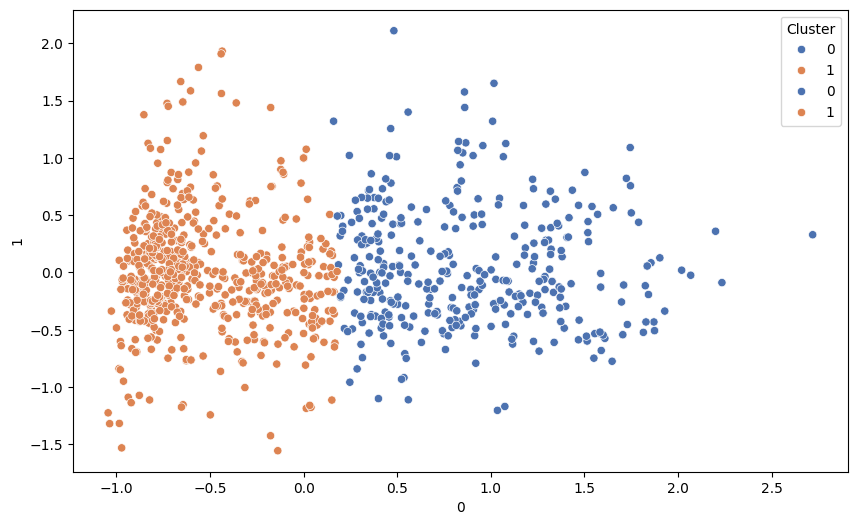

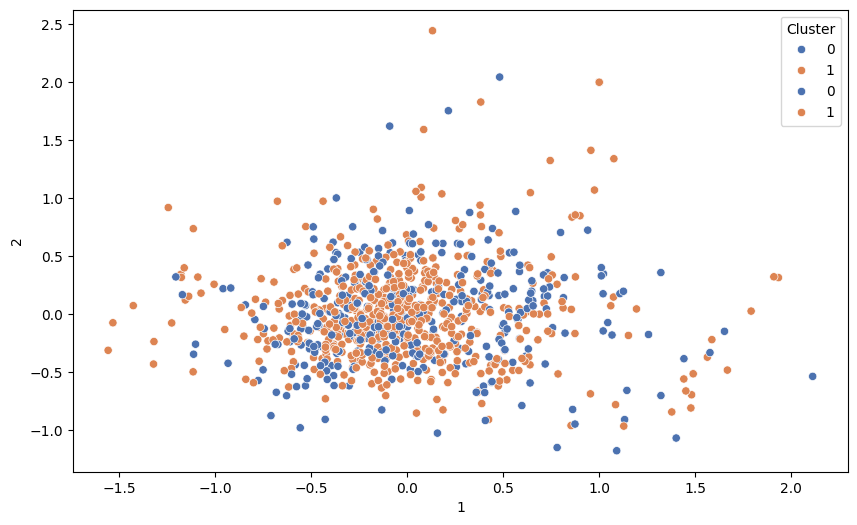

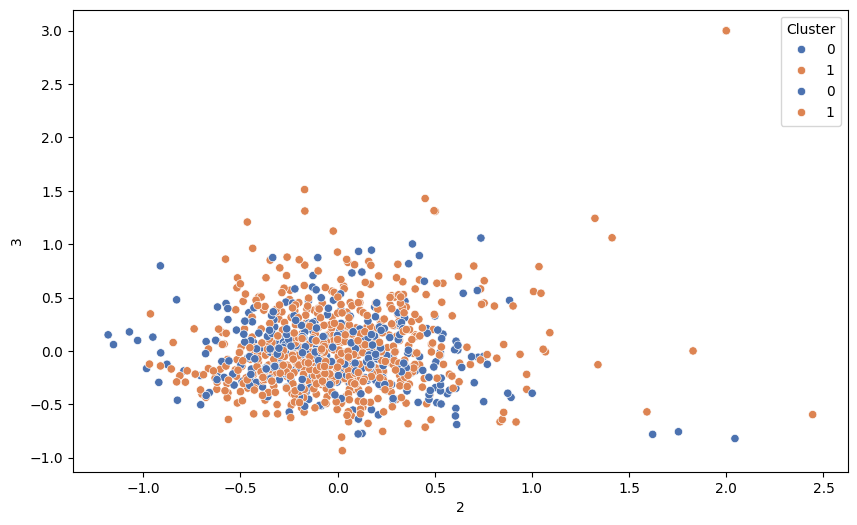

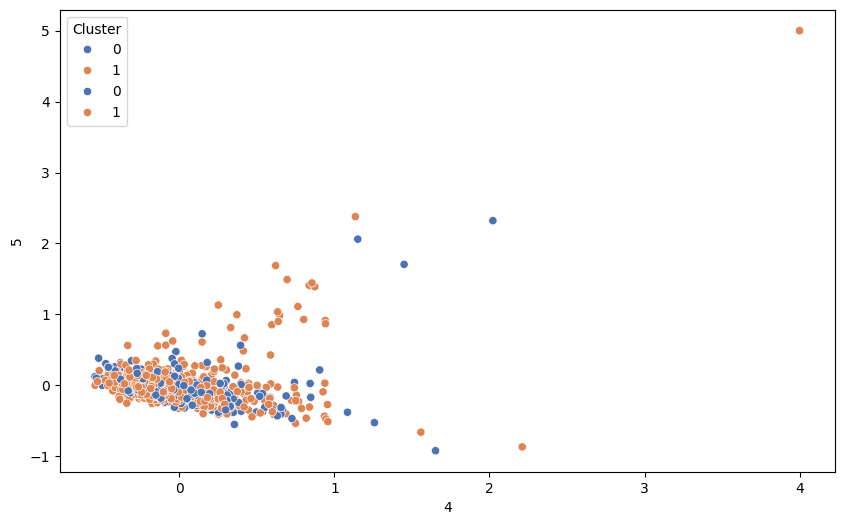

In [19]:

labels = km_best.fit_predict(review_data)


review_data['Cluster'] = labels


feature_pairs = [
    (0, 1), 
    (1, 2),  
    (2, 3), 
    (4, 5)   
]

for x_feature, y_feature in feature_pairs:
    plt.figure(figsize=(10, 6))
    sb.scatterplot(data=review_data, x=review_data.columns[x_feature], y=review_data.columns[y_feature], hue='Cluster', palette='deep')
    sb.scatterplot(data=review_data, x=x_feature, y=y_feature, hue='Cluster', palette='deep')

the first scatterplot had very clear clusters, but not the rest

# agglomerative

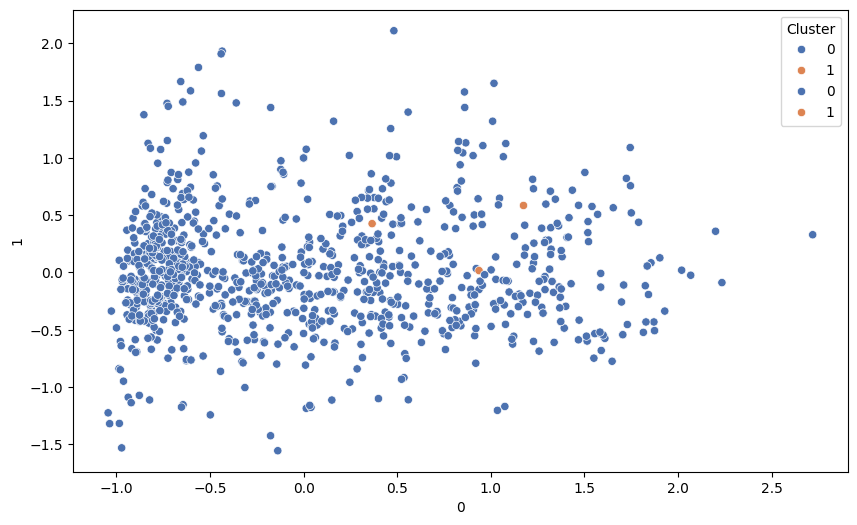

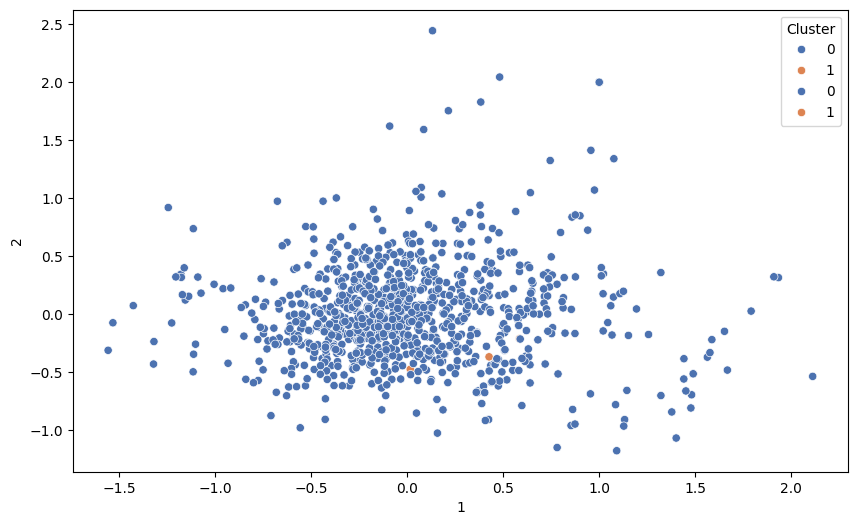

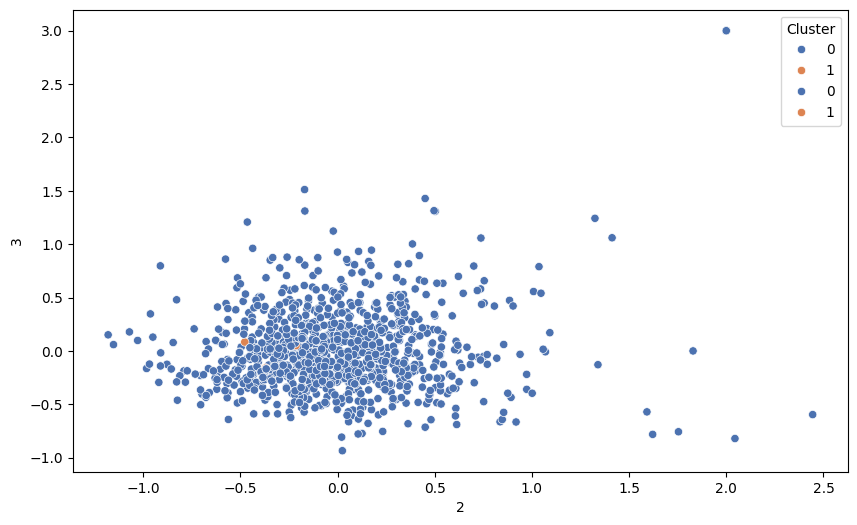

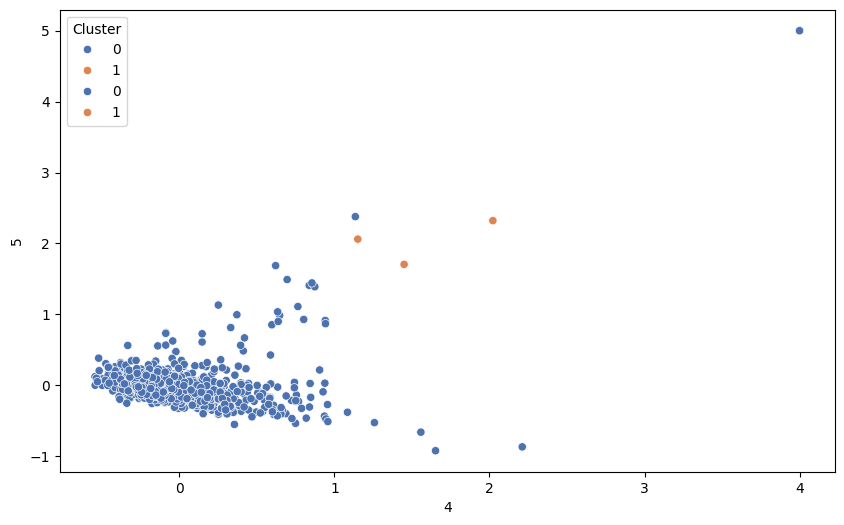

In [20]:

labels = ac_best.fit_predict(review_data)


review_data['Cluster'] = labels


feature_pairs = [
    (0, 1), 
    (1, 2),  
    (2, 3), 
    (4, 5)   
]

for x_feature, y_feature in feature_pairs:
    plt.figure(figsize=(10, 6))
    sb.scatterplot(data=review_data, x=review_data.columns[x_feature], y=review_data.columns[y_feature], hue='Cluster', palette='deep')
    sb.scatterplot(data=review_data, x=x_feature, y=y_feature, hue='Cluster', palette='deep')

this looks better, but there are very few orange dots in this scatterplot, which means a very empty cluster

# dbscan

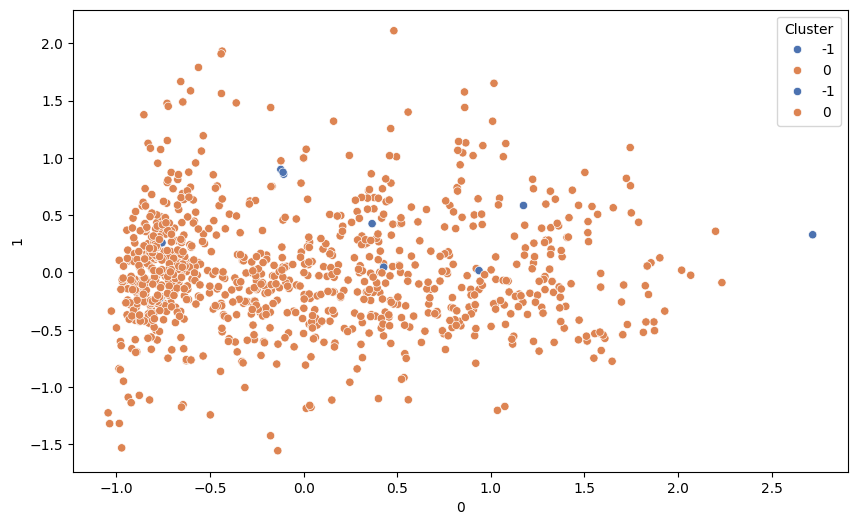

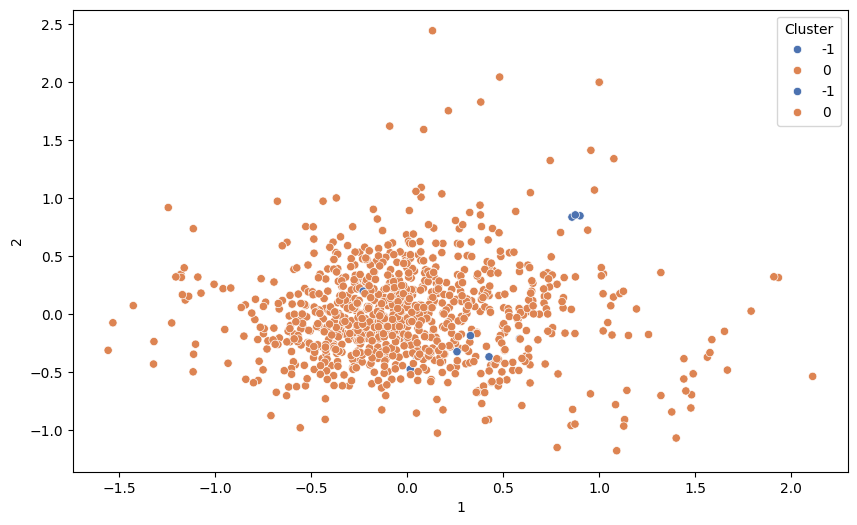

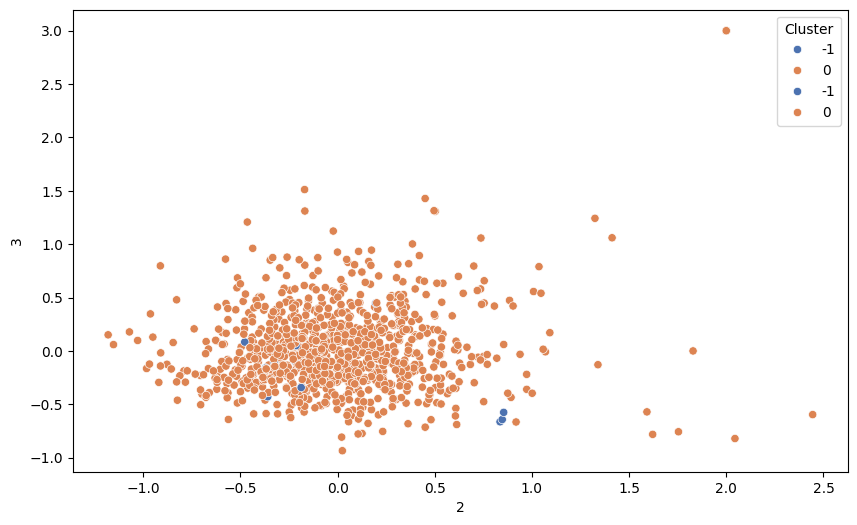

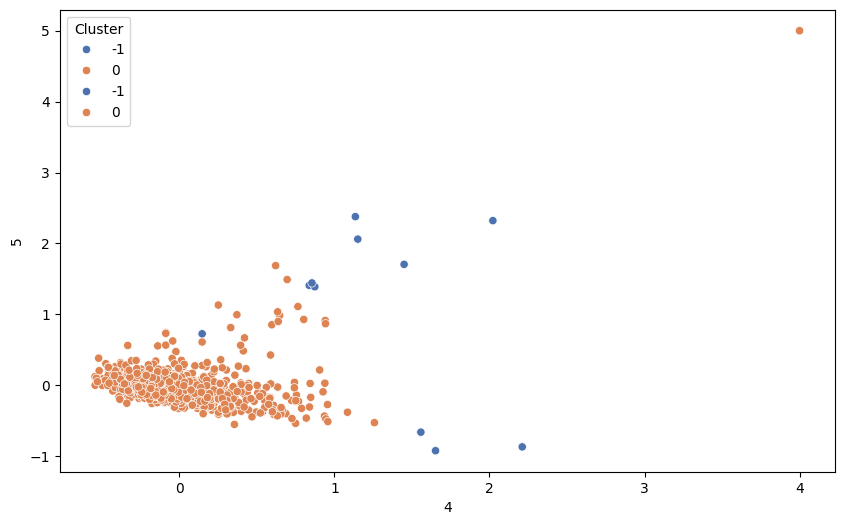

In [21]:
labels = dbscan_best.fit_predict(review_data)


review_data['Cluster'] = labels


feature_pairs = [
    (0, 1), 
    (1, 2),  
    (2, 3), 
    (4, 5)   
]

for x_feature, y_feature in feature_pairs:
    plt.figure(figsize=(10, 6))
    sb.scatterplot(data=review_data, x=review_data.columns[x_feature], y=review_data.columns[y_feature], hue='Cluster', palette='deep')
    sb.scatterplot(data=review_data, x=x_feature, y=y_feature, hue='Cluster', palette='deep')

this model also has the majority of the data in one cluster. the data looks more mixed then the agglomerative

# comparing the results and evaluation which model is the best:
looking at the internal evaluation it looks like the agglomerative clustering model is the best. it has better silhouette and davies score then the other two models. but looking at the clusters vizullization scatter plots only i would maybe say maybe the kmeans because it the data was more evenly distributed in the clusters

# Sources
PCA: https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html  
grid search for clustering: https://stackoverflow.com/questions/34611038grid-search-for-hyperparameter-evaluation-of-clustering-in-scikit-learn  

AgglomerativeClustering: https://scikit-learn.org/dev/modules/generated/sklearn.cluster.AgglomerativeClustering.html    
DBSCAN: https://scikit-learn.org/dev/modules/generated/sklearn.cluster.DBSCAN.html  
Kmeasn: https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html  